In [782]:
import pandas as pd
import os 
import duckdb
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
from researchpy import ttest as rpTtest
import researchpy as rp
import math

In [783]:
#     1: performed      0: is not performed
###   METHOD\Predictor    |   Gender       Gender(Score improvement)  Instrutor(Score improvement)   Race       Race(Score improvement)      Hometown              Intendedmajor            weighted_hs_gpa   
# pair t-test             |      1               0                              0                     0          0                              0                        0                        0  
# t-test for two samples  |      0               1                              1                     1          1                              0                        0                        0
# F-test ANOVA            |      0               0                              0                     0          0                              1                        1                        0
# Tukey test              |      0               0                              0                     0          0                              1                        1                        0
# Linear regression       |      0               0                              0                     0          0                              0                        0                        1

##### 'siginificant':     |      No              No                            Yes                    No         No                    F-test(Yes) Tukey(No)  |  F-test(Yes) Tukey(No)        Sad result :(

In [784]:
path = os.getcwd() #current path 

In [785]:
# read into the data
data = pd.read_excel('/Users/kyle/Documents/STUDYATNCSU/2022fallsemeter/ST542/Data&Coding/St542Project/data/The Single Cleaned Dataset.xlsx')
data = data.dropna()

In [786]:
data.head()

,First,Last,ID,Instructor,Gender,Race,Intendedmajor_begin,Intendedmajor_end,Hometown,Deidentified Number,...,AugRSFlexibility,AugRSOriginality,DecFluencySA_end,DecFlexibilitySA_end,DecOriginalitySA_end,DecAverageSA_end,DecRSFluency_end,DecRSFlexibility_end,DecRSOriginality_end,Include Student data
0,Bilal,Adam Malik,200398445.0,Dr. Erica Kosal,Male,Asian,Zoology,Zoology,City,1.0,...,44.0,49.0,100.0,122.0,101.0,108.0,89,61.0,73.0,Yes
1,Hifza,Alam,200404629.0,Dr. Kenny Kuo,Female,Asian,Biology - BS,Biology - BS,City,2.0,...,34.0,41.0,92.0,95.0,92.0,93.0,70,41.0,55.0,Yes
2,Ariba,Ali,200404663.0,Dr. Kenny Kuo,Female,Asian,Biology - BS,Biology - BS,City,3.0,...,42.0,65.0,108.0,111.0,106.0,108.0,110,54.0,85.0,Yes
3,Lexie,Allred,200394288.0,Dr. Kenny Kuo,Female,Caucasian; White,Biology - BS,Biology - BS,Rural Area,4.0,...,39.0,45.0,101.0,102.0,93.0,99.0,DecAverageSA_end,46.0,57.0,Yes
4,Fanuel,Andemariam,200430376.0,Dr. Kenny Kuo,Male,African-American; Black; African,Biochemistry,Biochemistry,City,5.0,...,36.0,48.0,91.0,93.0,90.0,91.0,69,40.0,51.0,Yes


In [787]:
# We have 198 students in our final dataset
data.shape

(198, 82)

In [788]:
# Instructor 
data.Instructor.value_counts()

Dr. Kenny Kuo      127
Dr. Erica Kosal     71
Name: Instructor, dtype: int64

In [789]:
# frequency table of gender
data['Gender'].value_counts()
# Why most of students are female?

Female                  167
Male                     27
Non-Binary                2
Prefer not to answer      2
Name: Gender, dtype: int64

In [790]:
# frequency table of Race
data.Race.value_counts()

Caucasian; White                             141
African-American; Black; African              15
Hispanic; Latinx                              13
Asian                                         10
Multiracial                                   10
Indian                                         8
Native Hawaiian or Other Pacific Islander      1
Name: Race, dtype: int64

In [791]:
# frequency table of intended major at the begin
data.Intendedmajor_begin.value_counts()

Biology - BS                  104
Biochemistry                   21
Zoology                        18
Biology - BA                   18
Nutrition                      15
Genetics                       15
Microbiology                    5
Plant Biology                   1
A major outside of science      1
Name: Intendedmajor_begin, dtype: int64

In [792]:
# frequency table of intended major at the end
data.Intendedmajor_end.value_counts()

Biology - BS                  100
Nutrition                      18
Biochemistry                   16
Genetics                       16
Zoology                        15
Biology - BA                   15
A major outside of science     12
Microbiology                    4
Plant Biology                   2
Name: Intendedmajor_end, dtype: int64

In [793]:
# frequency tale of homtown
data.Hometown.value_counts()

Town          62
City          52
Suburb        49
Rural Area    31
Village        4
Name: Hometown, dtype: int64

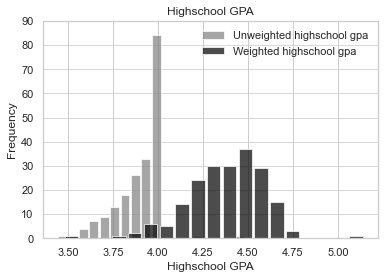

In [794]:
# histogram for High school GPA

n, bins, patches = plt.hist(x=data.iloc[:, 10], bins='auto', color='gray',
                            alpha=0.7, rwidth=0.85, label = 'Unweighted highschool gpa')
n1, bins1, patches1 = plt.hist(x=data.iloc[:, 11], bins='auto', color='black',
                            alpha=0.7, rwidth=0.85, label='Weighted highschool gpa')                            
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Highschool GPA')
plt.ylabel('Frequency')
plt.title('Highschool GPA')
plt.legend(loc='best', frameon=False)
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()


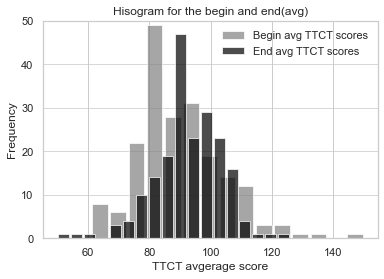

In [795]:
# histogram for begin and end TTCT score(Avg) 
n, bins, patches = plt.hist(x=data.iloc[:, 70], bins='auto', color='gray',
                            alpha=0.7, rwidth=0.85, label = 'Begin avg TTCT scores')
n1, bins1, patches1 = plt.hist(x=data.iloc[:, 77], bins='auto', color='black',
                            alpha=0.7, rwidth=0.85, label='End avg TTCT scores')                            
plt.grid(axis='y', alpha=0.75)
plt.xlabel('TTCT avgerage score')
plt.ylabel('Frequency')
plt.title('Hisogram for the begin and end(avg)')
plt.legend(loc='best', frameon=False)
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

qqplot for the begin avg score
qqplot for the end avg score


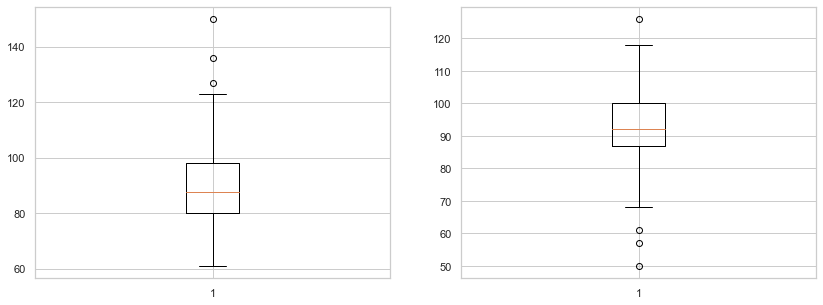

<Figure size 432x288 with 0 Axes>

In [796]:
# Boxplot for the begin and end TTCT score(avg)
from scipy.stats import norm
print('qqplot for the begin avg score')
# for each column we plot the qqplot
fig = plt.figure(figsize=(14,5))  
ax1 = fig.add_subplot(121) 
plt.boxplot(data.iloc[:,70])
print('qqplot for the end avg score')
ax1 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0.2, hspace=0.1)
plt.boxplot(data.iloc[:,77])
fig = plt.figure()

In [797]:
# according to the above plots, we can see that there is a score more than 140
highest_score = data.AugAverageSA.sort_values()
# the highest is 150
# because our score is standardized score(mean = 100 and std = 20)
# So the 150 in the range of 3 deviation 
# We will not take the highest a outlier
# Similiarly, we do not take the lowest score 50 as an outlier

qqplot for the begin and end avg score difference
AugAverageSA


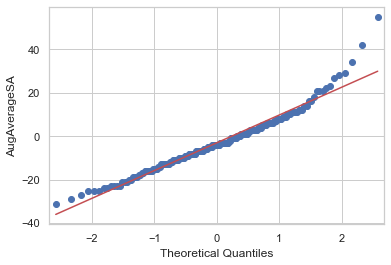

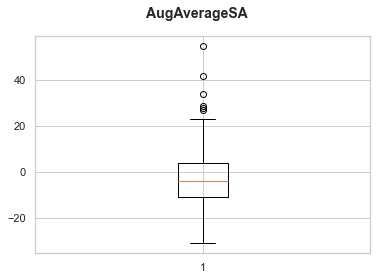

In [798]:
# For problem 1
# Is there a difference between begin and end 
# qqplot
print('qqplot for the begin and end avg score difference')
# for each column we plot the qqplot
print(data.columns[70])
sm.qqplot(data.iloc[:,70] - data.iloc[:,77], line = 's', ylabel = data.columns[70])
# boxplot
fig = plt.figure()
fig.suptitle(data.columns[70], fontsize=14, fontweight='bold')
plt.boxplot(data.iloc[:,70] - data.iloc[:,77])
plt.show()

In [799]:
# Assumptions of paired sample t-test
# Response variable should be measured on a continuous scale
# No significant outliers in the differences between the matched pairs. 
# The presence of significant outliers will skew the results, 
# Distribution of the differences of the matched pairs should be approximately normally distributed. Or if the observation number is greater than 30. With applying the central limit theorem(CLT), we can say that the distribution of samples approximates a normal distribution as the sample size gets larger regardless of the population's distribution.
# The observations should be independent from each other. 

rpRes = []
# paired t-test
result = rpTtest(data.iloc[:, 70], data.iloc[:, 77], equal_variances = True, paired = True)
rpRes.append(result)
# References: McDonald, J.H(2014). Handbook of Biology Statistics(3 rd). Baltimore:Sparky House Publishing
result

# conclusion:
# We can say students improve the ability of creative thinking after taking the LSC101 class

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/researchpy/ttest.py:38: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/researchpy/ttest.py:140: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



(           Variable      N       Mean         SD        SE  95% Conf.  \
 0      AugAverageSA  198.0  89.651515  14.270938  1.014191  87.651450   
 1  DecAverageSA_end  198.0  92.696970  10.754250  0.764271  91.189766   
 2              diff  198.0  -3.045455  12.838827  0.912416  -4.844810   
 
     Interval  
 0  91.651581  
 1  94.204173  
 2  -1.246099  ,
                              Paired samples t-test   results
 0  Difference (AugAverageSA - DecAverageSA_end) =    -3.0455
 1                            Degrees of freedom =   197.0000
 2                                             t =    -3.3378
 3                         Two side test p value =     0.0010
 4                        Difference < 0 p value =     0.0005
 5                        Difference > 0 p value =     0.9995
 6                                     Cohen's d =    -0.2434
 7                                     Hedge's g =    -0.2429
 8                                Glass's delta1 =    -0.2134
 9               

In [800]:
# reference: https://www.kaggle.com/code/adachowicz/house-prices-random-forest-regression-analysis
# Pre-processing Categorical Features
# define a function to convert an object (categorical) feature into an int feature
# 0 = most common category, highest int = least common.
def getObjectFeature(df, col, datalength=500):
    if df[col].dtype!='object': # if it's not categorical..
        print('feature',col,'is not an object feature.')
        return df
    elif len([i for i in df[col].T.notnull() if i == True])!=datalength: # if there's missing data..
        print('feature',col,'is missing data.')
        return df
    else:
        df1 = df
        if col == 'Intendedmajor_end':
            counts = df1['Intendedmajor_begin'].value_counts()
        else:
            counts = df1[col].value_counts() # get the counts for each label for the feature
        df1[col+'_cate'] = [counts.index.tolist().index(i) for i in df1[col]] # do the conversion
        print('******The category variable is:', col,'******')
        for i in range(len(counts)):
            print(counts.index[i], 'is',i)
        return df1 # make the new (integer) column from the conversion

# and test the function...
# fcntest = getObjectFeature(data, 'Gender', len(data.Gender))
data = getObjectFeature(data, 'Race', len(data.Race))
data = getObjectFeature(data, 'Hometown', len(data.Hometown))
data = getObjectFeature(data, 'Gender', len(data.Gender))
data = getObjectFeature(data, 'Intendedmajor_begin', len(data.Intendedmajor_begin))
data = getObjectFeature(data, 'Intendedmajor_end', len(data.Intendedmajor_end))
data.head(10)

******The category variable is: Race ******
Caucasian; White is 0
African-American; Black; African is 1
Hispanic; Latinx is 2
Asian is 3
Multiracial is 4
Indian is 5
Native Hawaiian or Other Pacific Islander is 6
******The category variable is: Hometown ******
Town is 0
City is 1
Suburb is 2
Rural Area is 3
Village is 4
******The category variable is: Gender ******
Female is 0
Male is 1
Non-Binary is 2
Prefer not to answer is 3
******The category variable is: Intendedmajor_begin ******
Biology - BS is 0
Biochemistry is 1
Zoology is 2
Biology - BA is 3
Nutrition is 4
Genetics is 5
Microbiology is 6
Plant Biology is 7
A major outside of science is 8
******The category variable is: Intendedmajor_end ******
Biology - BS is 0
Biochemistry is 1
Zoology is 2
Biology - BA is 3
Nutrition is 4
Genetics is 5
Microbiology is 6
Plant Biology is 7
A major outside of science is 8


,First,Last,ID,Instructor,Gender,Race,Intendedmajor_begin,Intendedmajor_end,Hometown,Deidentified Number,...,DecAverageSA_end,DecRSFluency_end,DecRSFlexibility_end,DecRSOriginality_end,Include Student data,Race_cate,Hometown_cate,Gender_cate,Intendedmajor_begin_cate,Intendedmajor_end_cate
0,Bilal,Adam Malik,200398445.0,Dr. Erica Kosal,Male,Asian,Zoology,Zoology,City,1.0,...,108.0,89,61.0,73.0,Yes,3,1,1,2,2
1,Hifza,Alam,200404629.0,Dr. Kenny Kuo,Female,Asian,Biology - BS,Biology - BS,City,2.0,...,93.0,70,41.0,55.0,Yes,3,1,0,0,0
2,Ariba,Ali,200404663.0,Dr. Kenny Kuo,Female,Asian,Biology - BS,Biology - BS,City,3.0,...,108.0,110,54.0,85.0,Yes,3,1,0,0,0
3,Lexie,Allred,200394288.0,Dr. Kenny Kuo,Female,Caucasian; White,Biology - BS,Biology - BS,Rural Area,4.0,...,99.0,DecAverageSA_end,46.0,57.0,Yes,0,3,0,0,0
4,Fanuel,Andemariam,200430376.0,Dr. Kenny Kuo,Male,African-American; Black; African,Biochemistry,Biochemistry,City,5.0,...,91.0,69,40.0,51.0,Yes,1,1,1,1,1
5,Katherine,Angeles Solano,200400013.0,Dr. Erica Kosal,Female,Hispanic; Latinx,Biology - BS,Biology - BS,Town,7.0,...,107.0,119,51.0,95.0,Yes,2,0,0,0,0
6,Avni,Arora,200388280.0,Dr. Kenny Kuo,Female,Indian,Nutrition,Nutrition,Suburb,8.0,...,89.0,72,31.0,62.0,Yes,5,2,0,4,4
8,Ria,Bakshi,200404999.0,Dr. Kenny Kuo,Female,Indian,Biology - BS,Genetics,Suburb,10.0,...,104.0,92,45.0,74.0,Yes,5,2,0,0,5
9,Shalyn,Barker,200405063.0,Dr. Erica Kosal,Female,Caucasian; White,Biology - BA,A major outside of science,Rural Area,12.0,...,118.0,145,59.0,122.0,Yes,0,3,0,3,8
10,Caroline,Barnhill,200405077.0,Dr. Erica Kosal,Female,Caucasian; White,Biology - BS,Biology - BS,City,13.0,...,101.0,99,52.0,78.0,Yes,0,1,0,0,0


In [801]:
### problem 2
# At least from above analysis, we hace enough evidence to say that students' creative thinking 
# will improve after taking the class.
# Now we want to explore if there is a difference ability between female and male's creative thinking ability
# Get the female group
TTCTscore_female = data[data.Gender_cate == 0]['AugAverageSA']
# Get the male group
TTCTscore_male = data[data.Gender_cate == 1]['DecAverageSA_end']

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



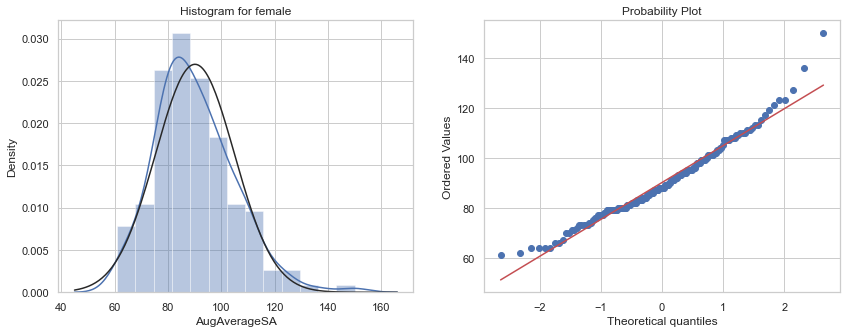

<Figure size 432x288 with 0 Axes>

In [802]:
# 3 conditions for T-test
# 1. Both sample random
# 2. Both populations Normal
# 3. Samples independent of each other
#lets’s quickly look at the female sample distribution by plotting histogram
from scipy.stats import norm
fig = plt.figure(figsize=(14,5))   

ax = fig.subplots_adjust(wspace=0.2, hspace=0.1)
# histogram for female
ax1 = fig.add_subplot(121) 
ax1.set_title("Histogram for female")
sns.distplot(TTCTscore_female[:,],fit=norm)
ax2 = fig.add_subplot(122) 
res = stats.probplot(TTCTscore_female[:,], plot=plt)
fig = plt.figure()

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



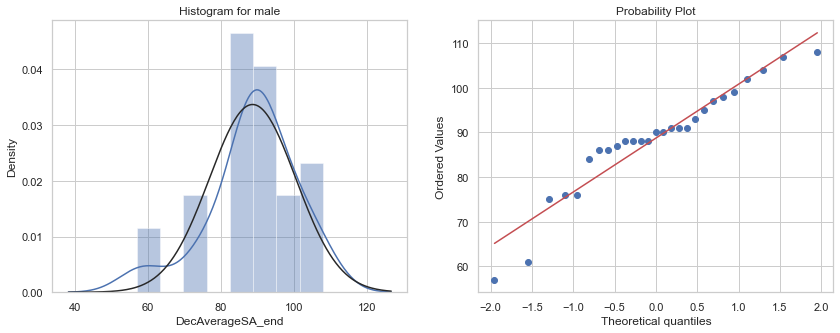

<Figure size 432x288 with 0 Axes>

In [803]:
# histogram and qqplot for male ttct score
fig = plt.figure(figsize=(14,5))   
ax = fig.subplots_adjust(wspace=0.2, hspace=0.1)
# histogram for female
ax1 = fig.add_subplot(121) 
ax1.set_title("Histogram for male")
sns.distplot(TTCTscore_male[:,],fit=norm)
ax2 = fig.add_subplot(122) 
res = stats.probplot(TTCTscore_male[:,], plot=plt)
fig = plt.figure()

In [804]:
# t-test for means of female and male creative thinking ability
summary, results = rp.ttest(group1= TTCTscore_male[:,], group1_name= "Male",
         group2= TTCTscore_female[:,], group2_name= "Female")
print(summary)
print(results)

   Variable      N       Mean         SD        SE  95% Conf.   Interval
0      Male   27.0  88.740741  12.059444  2.320841  83.970183  93.511298
1    Female  167.0  90.155689  14.842537  1.148550  87.888040  92.423337
2  combined  194.0  89.958763  14.467700  1.038720  87.910062  92.007464
              Independent t-test   results
0  Difference (Male - Female) =    -1.4149
1          Degrees of freedom =   192.0000
2                           t =    -0.4705
3       Two side test p value =     0.6385
4      Difference < 0 p value =     0.3192
5      Difference > 0 p value =     0.6808
6                   Cohen's d =    -0.0976
7                   Hedge's g =    -0.0972
8              Glass's delta1 =    -0.1173
9            Point-Biserial r =    -0.0339


/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/researchpy/ttest.py:38: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [805]:
######### NEXT ##########

In [806]:
# Now let us to explore if Gender will affect the score improvement 
# make a difference
# We will consider the gender answer of Non-Binary and Prefer not to answer
# becasue the number of these two group is too small
data['avg_dif'] = data['DecAverageSA_end'] - data['AugAverageSA']
# Get the female group
TTCTscore_avgdif_female = data[data.Gender_cate == 0]['avg_dif']
# Get the male group
TTCTscore_avgdif_male = data[data.Gender_cate == 1]['avg_dif']

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



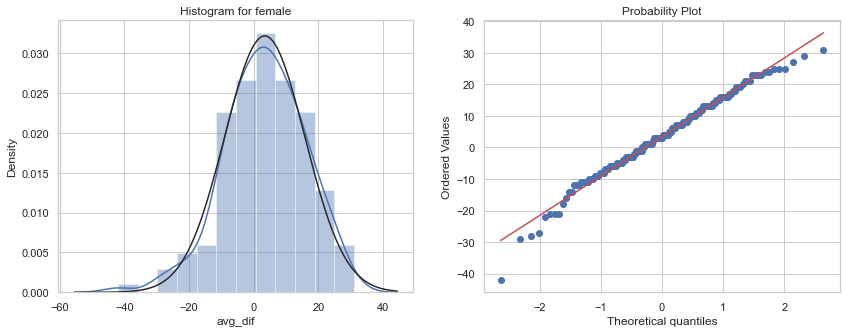

<Figure size 432x288 with 0 Axes>

In [807]:
# 3 conditions for T-test
# 1. Both sample random
# 2. Both populations Normal
# 3. Samples independent of each other
#lets’s quickly look at the female sample distribution by plotting histogram
from scipy.stats import norm
fig = plt.figure(figsize=(14,5))   
fig.subplots_adjust(wspace=0.2, hspace=0.1)
# histogram for female
ax1 = fig.add_subplot(121) 
ax1.set_title("Histogram for female")
sns.distplot(TTCTscore_avgdif_female[:,],fit=norm)
ax1 = fig.add_subplot(122) 
res = stats.probplot(TTCTscore_avgdif_female[:,], plot=plt)
fig = plt.figure()

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



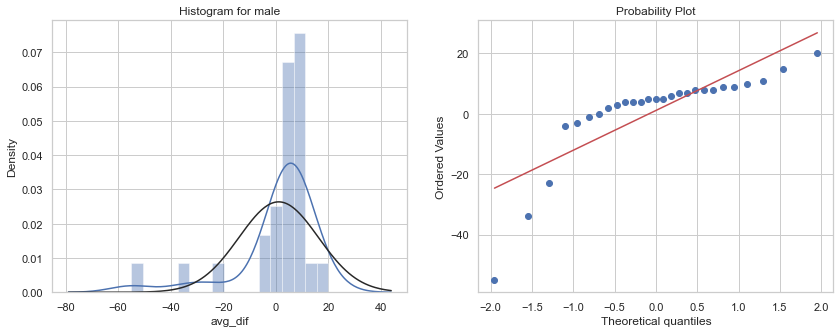

<Figure size 432x288 with 0 Axes>

In [808]:
#lets’s quickly look at the male sample distribution by plotting histogram
from scipy.stats import norm
fig = plt.figure(figsize=(14,5))   
fig.subplots_adjust(wspace=0.2, hspace=0.1)

# histogram for female
ax1 = fig.add_subplot(121) 
ax1.set_title("Histogram for male")
sns.distplot(TTCTscore_avgdif_male[:,],fit=norm)
ax1 = fig.add_subplot(122) 
res = stats.probplot(TTCTscore_avgdif_male[:,], plot=plt)
fig = plt.figure()
# the qqplot shows our data for male is not normal.
# But cause our observation numbers for female and male are both greater than 30
# with applying the CLT, we can say that the distribution of sample means 
# approximates a normal distribution as the sample size gets larger,
#  regardless of the population's distribution.

In [809]:
# t-test for means of two Independent group
# t-test for male and female improvement
summary, results = rp.ttest(group1= TTCTscore_avgdif_male[:,], group1_name= "Male",
         group2= TTCTscore_avgdif_female[:,], group2_name= "Female")
print(summary)
print(results)

   Variable      N      Mean         SD        SE  95% Conf.  Interval
0      Male   27.0  1.111111  15.408123  2.965295  -4.984139  7.206362
1    Female  167.0  3.407186  12.439325  0.962584   1.506701  5.307671
2  combined  194.0  3.087629  12.872735  0.924209   1.264783  4.910475
              Independent t-test   results
0  Difference (Male - Female) =    -2.2961
1          Degrees of freedom =   192.0000
2                           t =    -0.8593
3       Two side test p value =     0.3912
4      Difference < 0 p value =     0.1956
5      Difference > 0 p value =     0.8044
6                   Cohen's d =    -0.1782
7                   Hedge's g =    -0.1775
8              Glass's delta1 =    -0.1490
9            Point-Biserial r =    -0.0619


/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/researchpy/ttest.py:38: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [810]:
######### NEXT ##########

In [811]:
#t-test for two groups of instructors
# Dr. Kenny Kuo  
dif_Kenny = data[data.Instructor == 'Dr. Kenny Kuo']['avg_dif']
# Dr. Erica Kosal
dif_Erica = data[data.Instructor == 'Dr. Erica Kosal']['avg_dif']

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



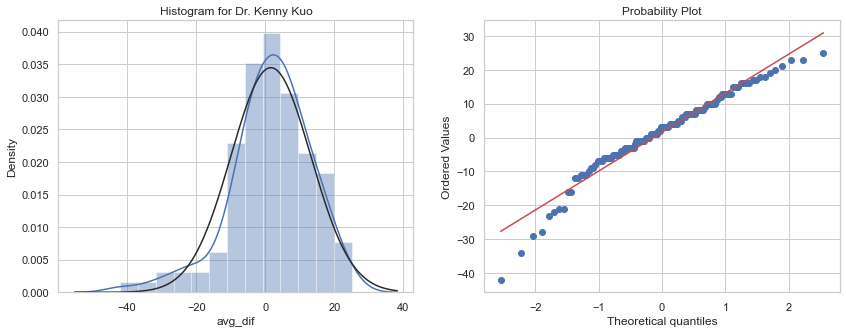

<Figure size 432x288 with 0 Axes>

In [812]:
# 3 conditions for T-test
# 1. Both sample random
# 2. Both populations Normal
# 3. Samples independent of each other
#lets’s quickly look at the Dr.Kenny distribution by plotting histogram
fig = plt.figure(figsize=(14,5))   
fig.subplots_adjust(wspace=0.2, hspace=0.1)
# histogram for female
ax1 = fig.add_subplot(121) 
ax1.set_title("Histogram for Dr. Kenny Kuo")
sns.distplot(dif_Kenny[:,],fit=norm)
ax1 = fig.add_subplot(122) 
res = stats.probplot(dif_Kenny[:,], plot=plt)
fig = plt.figure()

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



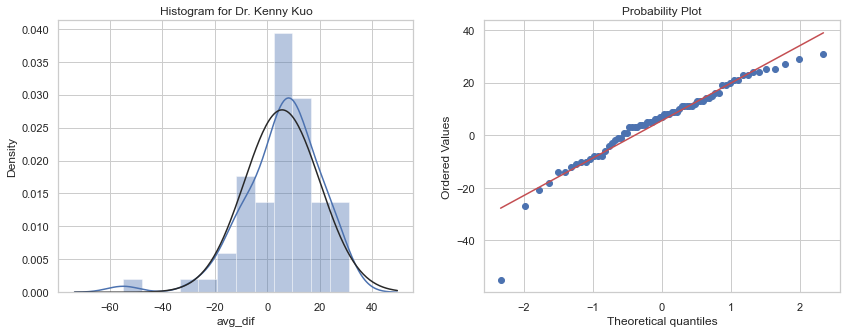

<Figure size 432x288 with 0 Axes>

In [813]:
# quickly look at the Dr.Erica distribution by plotting histogram
fig = plt.figure(figsize=(14,5))   
fig.subplots_adjust(wspace=0.2, hspace=0.1)
# histogram for female
ax1 = fig.add_subplot(121) 
ax1.set_title("Histogram for Dr. Kenny Kuo")
sns.distplot(dif_Erica[:,],fit=norm)
ax1 = fig.add_subplot(122) 
res = stats.probplot(dif_Erica[:,], plot=plt)
fig = plt.figure()

In [814]:
# t-test for means of two Independent group
# t-test for male and female improvement
summary, results = rp.ttest(group1= dif_Erica[:,], group1_name= "Erica",
         group2= dif_Kenny[:,], group2_name= "Kenny")
print(summary)
print(results)

   Variable      N      Mean         SD        SE  95% Conf.  Interval
0     Erica   71.0  5.605634  14.506628  1.721620   2.171971  9.039297
1     Kenny  127.0  1.614173  11.621031  1.031200  -0.426541  3.654887
2  combined  198.0  3.045455  12.838827  0.912416   1.246099  4.844810
              Independent t-test   results
0  Difference (Erica - Kenny) =     3.9915
1          Degrees of freedom =   196.0000
2                           t =     2.1164
3       Two side test p value =     0.0356
4      Difference < 0 p value =     0.9822
5      Difference > 0 p value =     0.0178
6                   Cohen's d =     0.3136
7                   Hedge's g =     0.3124
8              Glass's delta1 =     0.2751
9            Point-Biserial r =     0.1495


/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/researchpy/ttest.py:38: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [815]:
# There is enough evidence to say that studetns imporve more after taking Erica's class
# than students after taking Kenny's class

In [816]:
#########NEXT############

In [817]:
# consider the Race
# There are 141 white students, but numbers of other studets are low(less than 20)
# When we check the normality of each race, the races having lower number do not 
# show the normality
# Finally, we grouped the other race except the white into a group for doing the t-test
# get the white group
white = data[data.Race == 'Caucasian; White']['AugAverageSA']
# get the other group|
others = data[data.Race != 'Caucasian; White']['AugAverageSA']
# Caucasian; White                             141
# African-American; Black; African              15
# Hispanic; Latinx                              13
# Asian                                         10
# Multiracial                                   10
# Indian                                         8
# Native Hawaiian or Other Pacific Islander      1

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



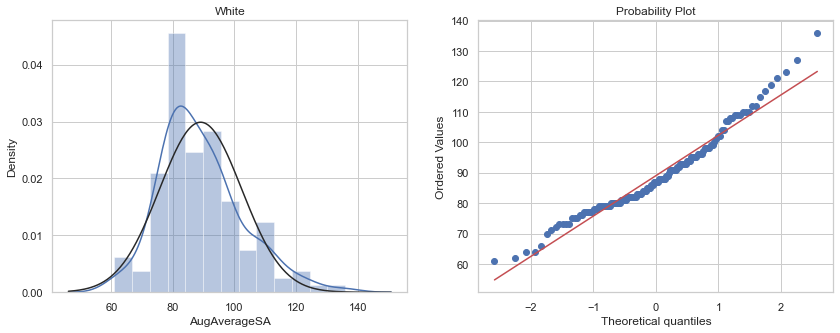

<Figure size 432x288 with 0 Axes>

In [818]:
# quickly look at the White begin score distribution by plotting histogram
fig = plt.figure(figsize=(14,5))   
fig.subplots_adjust(wspace=0.2, hspace=0.1)
# histogram for female
ax1 = fig.add_subplot(121) 
ax1.set_title("White")
sns.distplot(white[:,],fit=norm)
ax1 = fig.add_subplot(122) 
res = stats.probplot(white[:,], plot=plt)
fig = plt.figure()

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



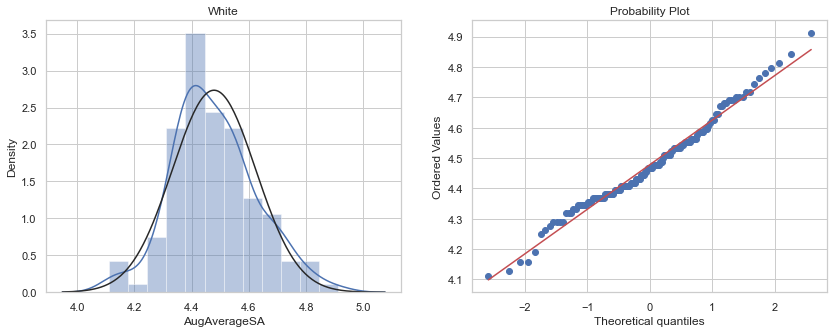

<Figure size 432x288 with 0 Axes>

In [819]:
# The histogram show left right skewness
# We take a log transform to it
# quickly look at the white with log transform distribution by plotting histogram
white = np.log(white[:,])
fig = plt.figure(figsize=(14,5))   
fig.subplots_adjust(wspace=0.2, hspace=0.1)
# histogram for female
ax1 = fig.add_subplot(121) 
ax1.set_title("White")
sns.distplot(white[:,],fit=norm)
ax1 = fig.add_subplot(122) 
res = stats.probplot(white[:,], plot=plt)
fig = plt.figure()
# The histogram show left right skewness
# We take a log transform to it

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



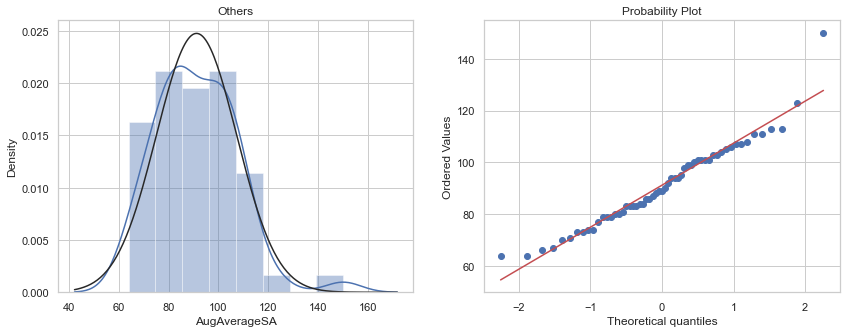

<Figure size 432x288 with 0 Axes>

In [820]:
# quickly look at the other races begin score distribution by plotting histogram
fig = plt.figure(figsize=(14,5))   
fig.subplots_adjust(wspace=0.2, hspace=0.1)
# histogram for female
ax1 = fig.add_subplot(121) 
ax1.set_title("Others")
sns.distplot(others[:,],fit=norm)
ax1 = fig.add_subplot(122) 
res = stats.probplot(others[:,], plot=plt)
fig = plt.figure()

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



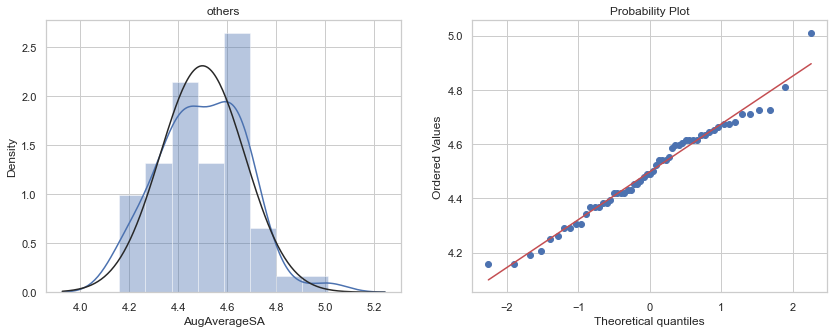

<Figure size 432x288 with 0 Axes>

In [821]:
# The histogram show left right skewness
# We take a log transform to it
# quickly look at the others with log transform distribution by plotting histogram
others = np.log(others[:,])
fig = plt.figure(figsize=(14,5))   
fig.subplots_adjust(wspace=0.2, hspace=0.1)
# histogram for female
ax1 = fig.add_subplot(121) 
ax1.set_title("others")
sns.distplot(others[:,],fit=norm)
ax1 = fig.add_subplot(122) 
res = stats.probplot(others[:,], plot=plt)
fig = plt.figure()
# The histogram show left right skewness
# We take a log transform to it
# Ah, the result is better

In [822]:
# t-test for means of two Independent group
# t-test for white and others begin score
summary, results = rp.ttest(group1= white[:,], group1_name= "White",
         group2= others[:,], group2_name= "Ohters")
print(summary)
print(results)

   Variable      N      Mean        SD        SE  95% Conf.  Interval
0     White  141.0  4.478073  0.146439  0.012332   4.453691  4.502455
1    Ohters   57.0  4.498090  0.174490  0.023112   4.451791  4.544388
2  combined  198.0  4.483835  0.154846  0.011004   4.462134  4.505537
               Independent t-test   results
0  Difference (White - Ohters) =    -0.0200
1           Degrees of freedom =   196.0000
2                            t =    -0.8229
3        Two side test p value =     0.4116
4       Difference < 0 p value =     0.2058
5       Difference > 0 p value =     0.7942
6                    Cohen's d =    -0.1292
7                    Hedge's g =    -0.1287
8               Glass's delta1 =    -0.1367
9             Point-Biserial r =    -0.0587


/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/researchpy/ttest.py:38: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [823]:
# There is no evidence to say any one group is higher than the ohters.
# The two side test p-value is -.4116, which is nearly 0.5.
# So we can say there is no difference in the creativity thinking bewteen white and others

In [824]:
############Next############

In [825]:
# let us check if there is difference of improvement between white and black students
# get the white group
# get the white group
white_im = data[data.Race == 'Caucasian; White']['avg_dif']
# get the other group|
others_im = data[data.Race != 'Caucasian; White']['avg_dif']

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



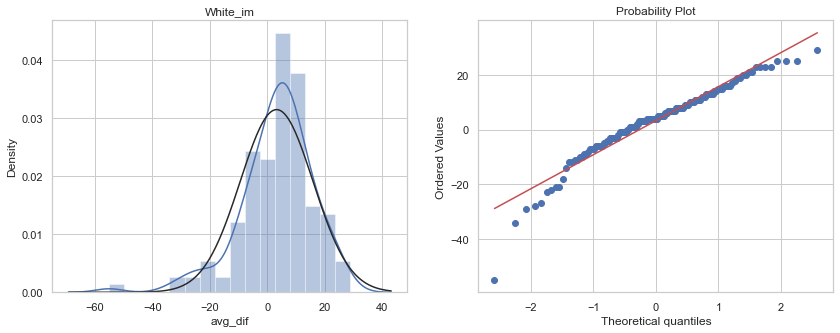

<Figure size 432x288 with 0 Axes>

In [826]:
# quickly look at the withe races improvement distribution by plotting histogram
fig = plt.figure(figsize=(14,5))   
fig.subplots_adjust(wspace=0.2, hspace=0.1)
# histogram for female
ax1 = fig.add_subplot(121) 
ax1.set_title("White_im")
sns.distplot(white_im[:,],fit=norm)
ax1 = fig.add_subplot(122) 
res = stats.probplot(white_im[:,], plot=plt)
fig = plt.figure()

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



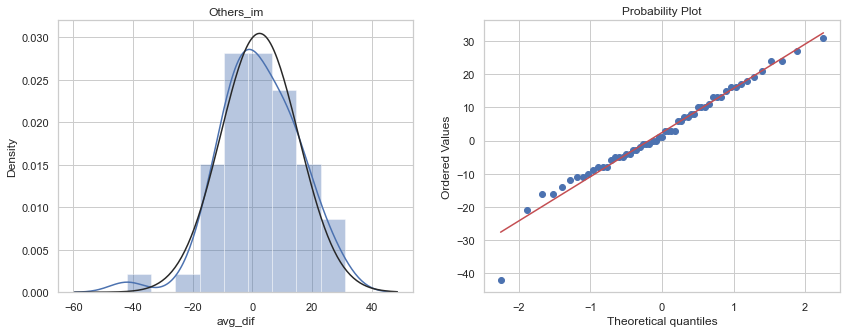

<Figure size 432x288 with 0 Axes>

In [827]:
# quickly look at the other races improvement distribution by plotting histogram
fig = plt.figure(figsize=(14,5))   
fig.subplots_adjust(wspace=0.2, hspace=0.1)
# histogram for female
ax1 = fig.add_subplot(121) 
ax1.set_title("Others_im")
sns.distplot(others_im[:,],fit=norm)
ax1 = fig.add_subplot(122) 
res = stats.probplot(others_im[:,], plot=plt)
fig = plt.figure()

In [828]:
# t-test for means of two Independent group
# t-test for white and others improvement
summary, results = rp.ttest(group1= white_im[:,], group1_name= "White_im",
         group2= others_im[:,], group2_name= "Ohters_im")
print(summary)
print(results)

    Variable      N      Mean         SD        SE  95% Conf.  Interval
0   White_im  141.0  3.297872  12.727218  1.071825   1.178817  5.416928
1  Ohters_im   57.0  2.421053  13.204365  1.748961  -1.082537  5.924642
2   combined  198.0  3.045455  12.838827  0.912416   1.246099  4.844810
                     Independent t-test   results
0  Difference (White_im - Ohters_im) =     0.8768
1                 Degrees of freedom =   196.0000
2                                  t =     0.4342
3              Two side test p value =     0.6646
4             Difference < 0 p value =     0.6677
5             Difference > 0 p value =     0.3323
6                          Cohen's d =     0.0682
7                          Hedge's g =     0.0679
8                     Glass's delta1 =     0.0689
9                   Point-Biserial r =     0.0310


/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/researchpy/ttest.py:38: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [829]:
# records of intended major chaging
intendedmajot_change = data[data.Intendedmajor_begin != data.Intendedmajor_end][['Intendedmajor_begin', 'Intendedmajor_end']].reset_index(drop=True)
# cross table
pd.crosstab(index = intendedmajot_change['Intendedmajor_begin'], columns=intendedmajot_change['Intendedmajor_end'])

Intendedmajor_end,A major outside of science,Biology - BA,Biology - BS,Genetics,Nutrition,Plant Biology,Zoology
Intendedmajor_begin,,,,,,,
Biochemistry,1,2,2,0,0,0,0
Biology - BA,2,0,11,0,0,0,0
Biology - BS,4,7,0,3,3,0,1
Genetics,0,0,1,0,1,0,0
Microbiology,0,0,0,0,0,1,0
Nutrition,1,0,0,0,0,0,0
Zoology,3,1,0,0,0,0,0


In [830]:
# records of intended major chaging
intendedmajot_change = data[data.Intendedmajor_begin != data.Intendedmajor_end][['Intendedmajor_begin', 'Intendedmajor_end']].reset_index(drop=True)
# cross table 
pd.crosstab(index = intendedmajot_change['Intendedmajor_begin'], columns=intendedmajot_change['Intendedmajor_end'], normalize='index').round(2)

Intendedmajor_end,A major outside of science,Biology - BA,Biology - BS,Genetics,Nutrition,Plant Biology,Zoology
Intendedmajor_begin,,,,,,,
Biochemistry,0.20,0.40,0.40,0.00,0.00,0.0,0.00
Biology - BA,0.15,0.00,0.85,0.00,0.00,0.0,0.00
Biology - BS,0.22,0.39,0.00,0.17,0.17,0.0,0.06
Genetics,0.00,0.00,0.50,0.00,0.50,0.0,0.00
Microbiology,0.00,0.00,0.00,0.00,0.00,1.0,0.00
Nutrition,1.00,0.00,0.00,0.00,0.00,0.0,0.00
Zoology,0.75,0.25,0.00,0.00,0.00,0.0,0.00


In [831]:
# Biology - BS                  104
# Biochemistry                   21
# Zoology                        18
# Biology - BA                   18
# Nutrition                      15
# Genetics                       15
# Microbiology                    5
# Plant Biology                   1
# A major outside of science      1
# Name: Intendedmajor_begin, dtype: int64
# The most interesting thing is that not onlymost of Biology - BA students changed their minds to persuring
# the Biology - BS, but also 13 of 18 students who wanted to persue Biology - BA changed 
# their minds

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



Biology - BS 's mean : 87.95192307692308
Nutrition 's mean : 92.73333333333333
Biochemistry 's mean : 90.38095238095238
Genetics 's mean : 90.2
Zoology 's mean : 94.16666666666667
Biology_BA 's mean : 87.16666666666667
Microbiology 's mean : 102.0


/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future vers

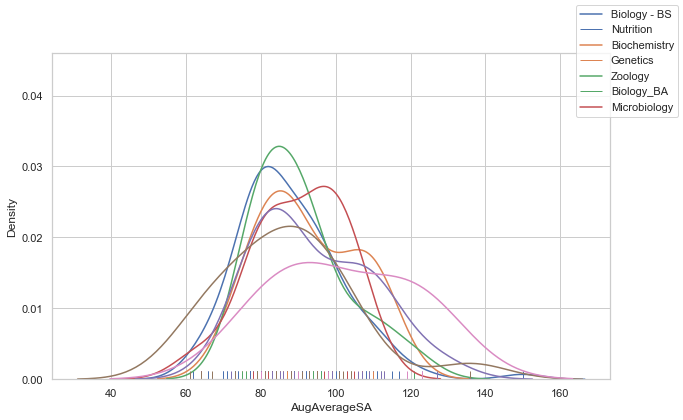

In [832]:
# F-test ANOVA for intendedmajors
# look at their distributions
# cause the numbers of Plant Biology and A major outside of science groups are 1, we remove these two groups
Biology_BS  = data[data.Intendedmajor_begin == 'Biology - BS']['AugAverageSA']
Biology_BS.columns = ['AugAverageSA']
Nutrition  = data[data.Intendedmajor_begin == 'Nutrition']['AugAverageSA']
Nutrition.columns = ['AugAverageSA']
Biochemistry  = data[data.Intendedmajor_begin == 'Biochemistry']['AugAverageSA']
Biochemistry.columns = ['AugAverageSA']
Genetics  = data[data.Intendedmajor_begin == 'Genetics']['AugAverageSA']
Genetics.columns = ['Genetics']
Zoology  = data[data.Intendedmajor_begin == 'Zoology']['AugAverageSA']
Zoology.columns = ['AugAverageSA']
Biology_BA  = data[data.Intendedmajor_begin == 'Biology - BA']['AugAverageSA']
Biology_BA.columns = ['AugAverageSA']
Microbiology  = data[data.Intendedmajor_begin == 'Microbiology']['AugAverageSA']
Microbiology.columns = ['AugAverageSA']

for i in range(7):
    print(['Biology - BS','Nutrition','Biochemistry', 'Genetics', 'Zoology', 'Biology_BA', 'Microbiology'][i],'\'s mean :',[Biology_BS,Nutrition,Biochemistry, Genetics, Zoology, Biology_BA, Microbiology][i].mean())
%matplotlib inline
fig = plt.figure(figsize=(10,6))
for i in [Biology_BS,Nutrition,Biochemistry, Genetics, Zoology, Biology_BA, Microbiology]:
    sns.distplot(i, hist=False, rug=True)
fig.legend(labels=['Biology - BS','Nutrition','Biochemistry', 'Genetics', 'Zoology', 'Biology_BA',  'Microbiology'])
plt.show()
# sns.displot(Biology_BS,x='AugAverageSA',hue='Intendedmajor_begin',kind='kde',height=5,aspect=2)
# sns.displot(Biology_BS,x='AugAverageSA',hue='Intendedmajor_begin',multiple='dodge',height=5,aspect=2)

In [833]:
# Normality: To check the normality of our data, since some of our sample size is small, we will use Shapiro-Wilke Test as our goodness of fit test by using the SciPy stats module.
#Normality:
def shapiro_test(x):
    a = 0.05
    test = stats.shapiro(x)
    if test.pvalue < 0.5:
        return f'The distribution departed from normality significantly, W= {round(test.statistic,2)}, P value= {round(test.pvalue,2)}'
    else:
        return f"Shapiro Wilk Test result didn't show non-normality, W= {round(test.statistic,2)}, P value= {round(test.pvalue,2)}. There is no evidence to reject the null hypothesis of normality."
for i in range(7):
    print(['Biology - BS','Nutrition','Biochemistry', 'Genetics', 'Zoology', 'Biology_BA', 'Microbiology'][i], shapiro_test([Biology_BS,Nutrition,Biochemistry, Genetics, Zoology, Biology_BA, Microbiology][i]))
    print('\n')

Biology - BS The distribution departed from normality significantly, W= 0.94, P value= 0.0


Nutrition The distribution departed from normality significantly, W= 0.92, P value= 0.16


Biochemistry The distribution departed from normality significantly, W= 0.91, P value= 0.05


Genetics Shapiro Wilk Test result didn't show non-normality, W= 0.95, P value= 0.52. There is no evidence to reject the null hypothesis of normality.


Zoology The distribution departed from normality significantly, W= 0.93, P value= 0.18


Biology_BA The distribution departed from normality significantly, W= 0.93, P value= 0.22


Microbiology Shapiro Wilk Test result didn't show non-normality, W= 0.92, P value= 0.54. There is no evidence to reject the null hypothesis of normality.




In [834]:
# we can see from above results. Only groups having the highest numbers(Biology - BS, Biochemistry) departed from normality significantly. But considering their 
# numbers are high, so we can apply CLT to support the normality assumption.

In [835]:
#Let’s take a quick look at the variances of our groups. The values are pretty close to each other
from scipy.stats import bartlett
alpha = 0.05
stat, p_bartlet = bartlett(Biology_BS,Nutrition,Biochemistry, Genetics, Zoology, Biology_BA, Microbiology)
if p_bartlet <= alpha:
    print(p_bartlet,": small p-value suggests that populations do not have equal variances")
else:
    print(p_bartlet, ": large p-value suggests that our data is homogeneous")

0.6246926287184913 : large p-value suggests that our data is homogeneous


In [836]:
# We can say the variances are equal
# Now we are confident that our data fulfilling the assumptions,
# we can move on to conduct an ANOVA test.

In [837]:
# H0: There is no statistically significant difference between the results of these 7 groups of students.

# H1: There is a statistically significant difference between the performance of the students based on their intendedmajors.
# F-critical is the threshold value that we will compare with our F-statistic. If our F-statistic is more significant than the F-critical value we can reject the null hypothesis. (F-crit <F-stat)
# To be able to determine F-critical value, we need:
# alpha level,
# df1 = k-1 (dfn — degrees of freedom nominator),
# df2 = N-k (dfd — degrees of freedom denominator),
# where k = number of the groups, N = number of total observations.
# and the F distribution table (or the software). As it shows in the table at alpha=0.05, the F-critical value is ~3.0718. Let’s if SciPy agrees with it.
alpha = 0.05
from scipy.stats import f 
dfn = len([Biology_BS,Nutrition,Biochemistry, Genetics, Zoology, Biology_BA, Microbiology])-1
dfd = len(data) - 2 - len([Biology_BS,Nutrition,Biochemistry, Genetics, Zoology, Biology_BA, Microbiology])
f_crit = f.ppf(1-alpha,dfn,dfd)
print(f_crit)


2.1468112368758274


In [838]:
# Calculating the Test(F) Statistic and P-value
#Calculate overal mean
data_removed = data[(data.Intendedmajor_begin != 'Plant Biology') & (data.Intendedmajor_begin != 'A major outside of science')]
overal_mean = sum(data_removed['AugAverageSA']/len(data)-2)
#Calculate sums of squared mean differences for each observation in each group
ssb = []
for i in data_removed.Intendedmajor_begin.unique():
    group_mean = data_removed[data_removed.Intendedmajor_begin == i].AugAverageSA.mean()
    sqr_mean_diff = (group_mean-overal_mean)**2
    sum_sqr = len(data_removed[data_removed.Intendedmajor_begin == i])*sqr_mean_diff
    ssb.append(sum_sqr)
#Sum of group variability of each group
SSb = sum(ssb)
print(SSb)

30259088.044763166


In [839]:
#Then we can find Mean Square Between(MSb) by SSb/(K-1):
#Calculate MSb (Explained Variance)
k = len(data_removed.Intendedmajor_begin.unique())
MSb = SSb/(k-1)
print(MSb)

5043181.340793861


In [840]:
#Calculate sum of the squared differences between the observations and its group variance for each group
sum_sqr_diff = []
for i in data_removed.Intendedmajor_begin.unique():
    group_mean = data_removed[data_removed.Intendedmajor_begin == i].AugAverageSA.mean()
    sum_sqr = sum(list(map(lambda x: (x-group_mean)**2, data_removed[data_removed.Intendedmajor_begin == i].AugAverageSA)))
    sum_sqr_diff.append(sum_sqr)
    print(i,": "+str(sum_sqr))
#Add them together
SSw = sum(sum_sqr_diff)
print("SSw: " + str(SSw))


Zoology : 3920.499999999999
Biology - BS : 20156.75961538462
Biochemistry : 3056.9523809523807
Nutrition : 2340.933333333334
Biology - BA : 5378.499999999999
Genetics : 2028.4000000000003
Microbiology : 1374.0
SSw: 38256.045329670334


In [841]:
#Calculate MSw (Unexplained Variance) 
N = len(data_removed)
MSw = SSw/(N-k)
print('MSw:' ,MSw)

MSw: 202.412938252224


In [842]:
F_stat = MSb/MSw
F_stat

24915.311167063945

In [843]:
#Find the P-value 
p_value = f.sf(F_stat, dfn, dfd) #find p-value of F test statistic
print(p_value)

5.430512546381004e-271


In [844]:
# our ANOVA table
anova_table = pd.DataFrame({"Variation Source": ["Between Groups","Erro Residual","Total"],
                  "Sums of Squares":[round(SSb,2),round(SSw,2),round(SSb+SSw,2)],
                 "Mean Squares":[round(MSb,2),round(MSw,2),""]})
anova_table.set_index("Variation Source",inplace=True)
anova_table["F"] =[F_stat,"",""]
anova_table['P-Value'] = [str(p_value),"",""]
anova_table

,Sums of Squares,Mean Squares,F,P-Value
Variation Source,,,,
Between Groups,30259088.04,5043181.34,24915.311167,5.430512546381004e-271
Erro Residual,38256.05,202.41,,
Total,30297344.09,,,


In [845]:
# the one-way ANOVA tell us there is a statistically significant difference between the groups
# Let us perform Tukey’s Test to see which groups are different from each other
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# merge into a dataframe
group_list = []
number_list = []
group_name = ['Biology - BS','Nutrition','Biochemistry', 'Genetics', 'Zoology', 'Biology_BA', 'Microbiology']
n = 0
for i in [Biology_BS,Nutrition,Biochemistry, Genetics, Zoology, Biology_BA, Microbiology]:
    for k in range(len(i)):
        group_list.append(group_name[n])
        number_list.append(i.iloc[k])
    n += 1
df = pd.DataFrame(
    {
    'group' : group_list,
    'score' : number_list
    }
)
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------
Biochemistry Biology - BS   -2.429 0.9916 -12.5732  7.7152  False
Biochemistry   Biology_BA  -3.2143 0.9923 -16.8342 10.4057  False
Biochemistry     Genetics   -0.181    1.0 -14.5155 14.1536  False
Biochemistry Microbiology   11.619 0.6558  -9.4809  32.719  False
Biochemistry    Nutrition   2.3524  0.999 -11.9822  16.687  False
Biochemistry      Zoology   3.7857 0.9817  -9.8342 17.4057  False
Biology - BS   Biology_BA  -0.7853    1.0   -11.61 10.0395  False
Biology - BS     Genetics   2.2481 0.9975  -9.4631 13.9593  False
Biology - BS Microbiology  14.0481 0.3243  -5.3653 33.4614  False
Biology - BS    Nutrition   4.7814 0.8869  -6.9298 16.4926  False
Biology - BS      Zoology   6.2147 0.6095    -4.61 17.0395  False
  Biology_BA     Genetics   3.0333 0.9964 -11.7906 17.8573  False
  Biology_

In [846]:
# The result of tukey test is contradictory(no difference between on and each other)
# with the result of F-test ANOVA 
# The possible expalaination is:
# You can get misleading results from ANOVA in various situations.
#  One case for example is the "slippage configuration", where one mean is much different from the others, which are all close.
#  The ANOVA may result in a statistically significant difference because of
#  the different mean, but if this mean was removed, the p-value would be large, 
# ie the result is not statistically significant.
# reference: https://www.researchgate.net/post/Is-it-possible-to-get-non-significant-results-in-post-hoc-test-when-we-got-the-significant-result-in-ANOVA

Town 's mean : 88.61290322580645
City 's mean : 89.07692307692308
Suburb 's mean : 91.08163265306122
RuralArea 's mean : 90.48387096774194
Village 's mean : 89.25


/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/kyle/opt/anaconda3/envs/for_SAS2PY/lib/python3.8/sit

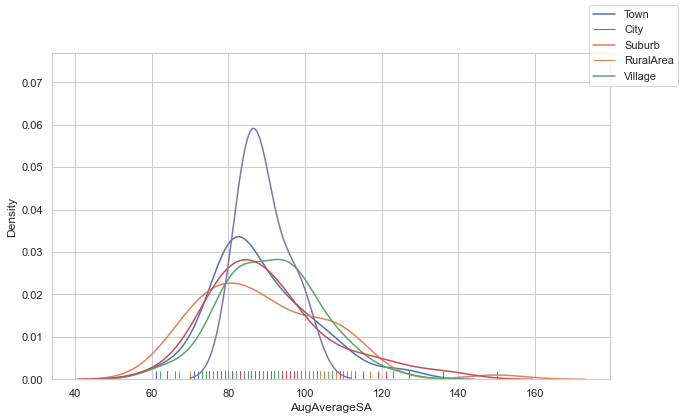

In [847]:
######F-test ANOVE for hometown#######
# Town          62
# City          52
# Suburb        49
# Rural Area    31
# Village        4
# Name: Hometown, dtype: int64

# F-test ANOVA for intendedmajors
# look at their distributions
# cause the numbers of Plant Biology and A major outside of science groups are 1, we remove these two groups
Town  = data[data.Hometown == 'Town']['AugAverageSA']
Town.columns = ['AugAverageSA']
City  = data[data.Hometown == 'City']['AugAverageSA']
City.columns = ['AugAverageSA']
Suburb  = data[data.Hometown == 'Suburb']['AugAverageSA']
Suburb.columns = ['AugAverageSA']
RuralArea  = data[data.Hometown == 'Rural Area']['AugAverageSA']
RuralArea.columns = ['AugAverageSA']
Village  = data[data.Hometown == 'Village']['AugAverageSA']
Village.columns = ['AugAverageSA']

for i in range(5):
    print(['Town','City', 'Suburb', 'RuralArea', 'Village'][i],'\'s mean :',[Town, City, Suburb, RuralArea, Village][i].mean())
%matplotlib inline
fig = plt.figure(figsize=(10,6))
for i in [Town, City, Suburb, RuralArea, Village]:
    sns.distplot(i, hist=False, rug=True)
fig.legend(labels=['Town','City', 'Suburb', 'RuralArea', 'Village'])
plt.show()
# sns.displot(Biology_BS,x='AugAverageSA',hue='Hometown',kind='kde',height=5,aspect=2)
# sns.displot(Biology_BS,x='AugAverageSA',hue='Hometown',multiple='dodge',height=5,aspect=2)

In [848]:
# Normality: Because the number of Village. We would like to check the normality of our data Village
# Normality:
def shapiro_test(x):
    a = 0.05
    test = stats.shapiro(x)
    if test.pvalue < 0.5:
        return f'The distribution departed from normality significantly, W= {round(test.statistic,2)}, P value= {round(test.pvalue,2)}'
    else:
        return f"Shapiro Wilk Test result didn't show non-normality, W= {round(test.statistic,2)}, P value= {round(test.pvalue,2)}. There is no evidence to reject the null hypothesis of normality."
for i in range(1):
    print(['Village'][i], shapiro_test([Village][i]))
    print('\n')
# It is not normal, so we remove the Village data

Village The distribution departed from normality significantly, W= 0.89, P value= 0.4




In [849]:
hometown_removed = data[data.Hometown != 'Village']
hometown_name_list = ['Town','City', 'Suburb', 'RuralArea']
hometown_variable_list = [Town, City, Suburb, RuralArea]
#Let’s take a quick look at the variances of our groups. The values are pretty close to each other
from scipy.stats import bartlett
alpha = 0.05
stat, p_bartlet = bartlett(Town, City, Suburb, RuralArea)
if p_bartlet <= alpha:
    print(p_bartlet,": small p-value suggests that populations do not have equal variances")
else:
    print(p_bartlet, ": large p-value suggests that our data is homogeneous")

0.10979906289935769 : large p-value suggests that our data is homogeneous


In [850]:
# We can say the variances are equal
# Now we are confident that our data fulfilling the assumptions,
# we can move on to conduct an ANOVA test.
# H0: There is no statistically significant difference between the results of these 4 groups of students.

# H1: There is a statistically significant difference between the creative thinking of the students based on their hometown description.
# F-critical is the threshold value that we will compare with our F-statistic. If our F-statistic is more significant than the F-critical value we can reject the null hypothesis. (F-crit <F-stat)
# To be able to determine F-critical value, we need:
# alpha level,
# df1 = k-1 (dfn — degrees of freedom nominator),
# df2 = N-k (dfd — degrees of freedom denominator),
# where k = number of the groups, N = number of total observations.
# and the F distribution table (or the software). As it shows in the table at alpha=0.05, the F-critical value is ~3.0718. Let’s if SciPy agrees with it.
alpha = 0.05
from scipy.stats import f 
dfn = len(hometown_name_list)-1
dfd = len(data) - 4 - len(hometown_name_list)
f_crit = f.ppf(1-alpha,dfn,dfd)
print(f_crit)


2.6521376237189798


In [851]:
# Calculating the Test(F) Statistic and P-value
#Calculate overal mean
overal_mean = sum(hometown_removed['AugAverageSA']/len(data)-4)
#Calculate sums of squared mean differences for each observation in each group
ssb = []
for i in hometown_removed.Hometown.unique():
    group_mean = hometown_removed[hometown_removed.Hometown == i].AugAverageSA.mean()
    sqr_mean_diff = (group_mean-overal_mean)**2
    sum_sqr = len(hometown_removed[hometown_removed.Hometown == i])*sqr_mean_diff
    ssb.append(sum_sqr)
#Sum of group variability of each group
SSb = sum(ssb)
print(SSb)

117368349.60593392


In [852]:
#Then we can find Mean Square Between(MSb) by SSb/(K-1):
#Calculate MSb (Explained Variance)
k = len(hometown_removed.Hometown.unique())
MSb = SSb/(k-1)
print(MSb)
#Calculate sum of the squared differences between the observations and its group variance for each group
sum_sqr_diff = []
for i in hometown_removed.Hometown.unique():
    group_mean = hometown_removed[hometown_removed.Hometown == i].AugAverageSA.mean()
    sum_sqr = sum(list(map(lambda x: (x-group_mean)**2, hometown_removed[hometown_removed.Hometown == i].AugAverageSA)))
    sum_sqr_diff.append(sum_sqr)
    print(i,": "+str(sum_sqr))
#Add them together
SSw = sum(sum_sqr_diff)
print("SSw: " + str(SSw))
#Calculate MSw (Unexplained Variance) 
N = len(hometown_removed)
MSw = SSw/(N-k)
print('MSw:' ,MSw)
F_stat = MSb/MSw
F_stat
#Find the P-value 
p_value = f.sf(F_stat, dfn, dfd) #find p-value of F test statistic
print(p_value)
# our ANOVA table
anova_table = pd.DataFrame({"Variation Source": ["Between Groups","Erro Residual","Total"],
                  "Sums of Squares":[round(SSb,2),round(SSw,2),round(SSb+SSw,2)],
                 "Mean Squares":[round(MSb,2),round(MSw,2),""]})
anova_table.set_index("Variation Source",inplace=True)
anova_table["F"] =[F_stat,"",""]
anova_table['P-Value'] = [str(p_value),"",""]
anova_table

39122783.201977976
City : 14611.692307692301
Rural Area : 7203.741935483871
Town : 10524.709677419361
Suburb : 7459.673469387755
SSw: 39799.81738998329
MSw: 209.47272310517522
0.0


,Sums of Squares,Mean Squares,F,P-Value
Variation Source,,,,
Between Groups,1.173683e+08,39122783.2,186767.912414,0.0
Erro Residual,3.979982e+04,209.47,,
Total,1.174081e+08,,,


In [853]:
# the one-way ANOVA tell us there is a statistically significant difference between the groups
# Let us perform Tukey’s Test to see which groups are different from each other
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# merge into a dataframe
group_list = []
number_list = []
group_name = hometown_name_list
n = 0
for i in hometown_variable_list:
    for k in range(len(i)):
        group_list.append(group_name[n])
        number_list.append(i.iloc[k])
    n += 1
df = pd.DataFrame(
    {
    'group' : group_list,
    'score' : number_list
    }
)
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
     City RuralArea   1.4069 0.9735  -7.1052 9.9191  False
     City    Suburb   2.0047 0.8986   -5.464 9.4734  False
     City      Town   -0.464 0.9982  -7.5181   6.59  False
RuralArea    Suburb   0.5978 0.9979  -8.0112 9.2067  False
RuralArea      Town   -1.871 0.9357 -10.1228 6.3808  False
   Suburb      Town  -2.4687 0.8088  -9.6393 4.7018  False
----------------------------------------------------------


In [854]:
# The tukey result is not siginificant, too.

In [855]:
##### linear regression for createive thinking and HSgpa####
#### The weighted hg gpa is more normal than the unwigthed one.
#  We would like to use the weighted hg gpa. 
#Let's start with a pairplot to get an overview of the data.
# reference : kaggle.com/code/fareselmenshawii/linear-regression-from-scratch
import plotly.express as px
x = data['weighted_hs_gpa']
y = data['AugAverageSA']
px.scatter(x=x, y=y,template='plotly_dark')

In [856]:
#Now let's scale the data
maximum = x.max()
x_norm = x / maximum

In [857]:
# for Linear Regression it is ok to initialize parameters to zero
def initialize_parameters():
    W = 0
    b = 0
    return W, b

def predict(X,W,b):
    prediction = np.dot(X,W) + b
    return prediction

#Now let's compute the cost function
def compute_cost(X,y,W,b):
    m = len(X)
    prediction = predict(X,W,b)
    j = np.sum(np.square(np.subtract(prediction, y)))
    j = j * 1/(2*m)
    return j

# Batch Gradient Descent
def compute_gradient(X,y,W,b):
    m = len(X)
    prediction = predict(X,W,b)
    db = 1/m * np.sum(np.subtract(prediction,y))
    dW =  1/m * np.sum(np.multiply(np.subtract(prediction,y),X))
    return dW, db

def train(X, y, iterations, alpha): 
    # number of training examples
    m = len(X)
    costs = [] #empty list for storing cost for plotting
    # Initialize paramers
    W, b = initialize_parameters()
    for i in range(iterations):

        # Calculate the gradient and update the parameters
        dW, db = compute_gradient(X, y, W, b )  

        # Update Parameters using w, b, alpha and gradient
        W = W - alpha * dW               
        b = b - alpha * db               


        cost =  compute_cost(X, y, W, b)
        costs.append(cost)
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(iterations/10) == 0:
            print(f"Iteration {i:4}: Cost {float(cost):8.2f}   ")
        
    return W, b,costs

W,b,cost = train(x_norm ,y, 20000, 0.01)
print("w,b found by gradient descent:", W, b)

Iteration    0: Cost  3982.52   
Iteration 2000: Cost   104.86   
Iteration 4000: Cost   104.70   
Iteration 6000: Cost   104.55   
Iteration 8000: Cost   104.41   
Iteration 10000: Cost   104.27   
Iteration 12000: Cost   104.14   
Iteration 14000: Cost   104.01   
Iteration 16000: Cost   103.88   
Iteration 18000: Cost   103.76   
w,b found by gradient descent: 31.648707102676184 62.626853943244505


In [858]:
fig = px.line(y=cost,title="Cost vs Iteration",template="plotly_dark")
fig.update_layout(
    title_font_color="#41BEE9", 
    xaxis=dict(color="#41BEE9",title="Iterations"), 
    yaxis=dict(color="#41BEE9",title="cost")
) 

fig.show()

In [859]:
b =62.626853943244505

a = 31.648707102676184

In [860]:
y_pred = a + b * x_norm

y_pred

0      81.404360
1      86.445682
2      84.546054
3      86.932766
4      84.728710
         ...    
250    86.445682
252    84.132032
253    85.374097
254    86.640516
255    84.412106
Name: weighted_hs_gpa, Length: 198, dtype: float64

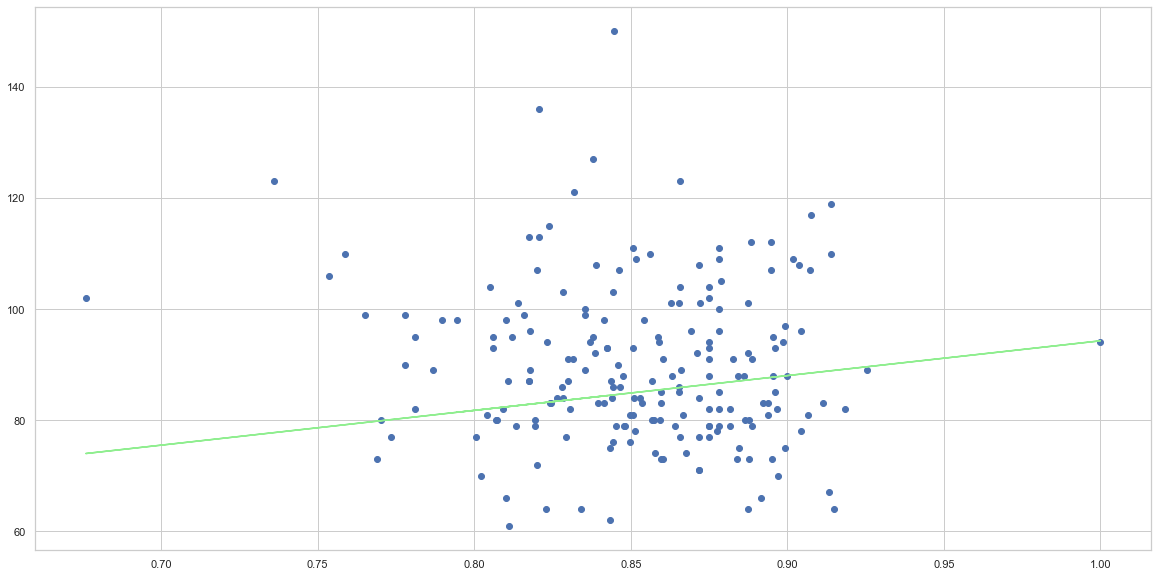

In [861]:
plt.figure(figsize=(20, 10))

plt.scatter(x_norm, y)
plt.plot(x_norm, y_pred, color='lightgreen')

plt.show()

In [862]:
r_squared = 1 - ((y_pred - x_norm)**2).sum() / (y_dif**2).sum()
print(f"R Squared: {r_squared}")


R Squared: -33.99838208137428
